In [1]:
import numpy as np

# Good intentions, wrong advice
## Don't follow these mantras, please - or at least, not in the way you think...

"Premature optimization is the root of all evil" (Knuth, Hoare - they blame each other)

"Make it work, Make it right, Make it fast" (Kent Beck, Agile Manifesto)


# These shouldn't be tradeoffs

Good design results in code that works right _and_ fast

It can be hard to undo bad design decisions (without rewriting from scratch)

Is this 'premature optimization'?

# Datatypes

Basic datatypes in Python (and numpy)

List vs np.ndarray

These have _very_ different performance profiles.  This is not a "Python thing" - these are fundamentally different data structures

https://en.wikipedia.org/wiki/Linked_list

https://en.wikipedia.org/wiki/Array_data_structure

https://en.wikipedia.org/wiki/Time_complexity

In [2]:
# Let's write a few functions to compare performance

def reorder_list(x: list, idx: list):
    return [x[i] for i in idx]

In [3]:
N = 100000

x_np = np.linspace(0.0,1.0,N)
x_list = list(x_np)

idx_r = range(N)

idx_np = np.array(idx_r)
idx_list = list(idx_r)

In [4]:
# Use the %time and %timeit macros to explore execution times
# We'll cover more advanced profiling later

In [5]:
%timeit _ = reorder_list(x_list, idx_list)

4.13 ms ± 560 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit _ = x_np[idx_np]

259 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
# Just using numpy datatypes isn't enough - we need to use numpy idioms

def reorder_ndarray_naive(x: np.ndarray, idx: np.ndarray):
    out = np.empty(len(x))
    for i, i_src in enumerate(idx):
        out[i] = x[i_src]
    return out

In [8]:
%timeit _ = reorder_ndarray_naive(x_np, idx_np)

41.5 ms ± 8.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Time complexity - data access

In [9]:
# Constant time O(1)

%timeit _ = x_np[100:800]
%timeit _ = x_np[100:80000]

250 ns ± 6.78 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
281 ns ± 4.67 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [10]:
# Linear time O(n)

%timeit _ = x_list[100:800]
%timeit _ = x_list[100:80000]

1.33 µs ± 37.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
233 µs ± 6.52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
# Pathological numpy - use the idioms!
# Forces O(n)

%timeit _ = x_np[range(100,800)]
%timeit _ = x_np[range(100,80000)]

83.2 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
17.9 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Time complexity - append

Lists do much better here!

In [12]:
%timeit _ = np.append(x_np,1.0)

43.8 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
big_arr = np.zeros(N*10)

%timeit _ = np.append(big_arr,1.0)

2.35 ms ± 302 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit _ = [].append(1.0)

82.2 ns ± 3.87 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [15]:
real_list = [x for x in range(1000)]

%timeit _ = real_list.append(1.0)

86.2 ns ± 5.36 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [16]:
del real_list

# Python specifics

...or...

## Make Python Fast by Not Using Python

(Don't worry, you already do)

In [17]:
import math

In [18]:
%timeit math.exp(5.0)

146 ns ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
%timeit np.exp(5.0)

736 ns ± 43.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [20]:
%timeit for x in big_arr: math.exp(x)

232 ms ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit np.exp(big_arr)

4.89 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## ufuncs

Functions in numpy (or derived from numpy) that operate over both scalars and arrays of arbitrary size

In [22]:
def naive_function(x:float , y: float):
    return (x*y)/math.exp(x+y)

In [23]:
naive_function(2.0,3.0)

0.040427681994512805

In [24]:
def naive_function_loop(x: list, y: list):
    out = []
    for xval,yval in zip(x,y):
        out.append(naive_function(xval, yval))
    return out

In [25]:
x = np.random.normal(size=(1000,))
y = np.random.normal(size=(1000,))

In [26]:
naive_function_loop(x,y)

[-0.36845859134455644,
 0.0951494699417954,
 -0.29852988025761057,
 0.12232149137310373,
 83.16120870126454,
 0.1432187911919531,
 -0.525312169584381,
 0.1345366068221361,
 -0.05812647210003038,
 0.08679143668469229,
 -0.6038892924658185,
 -0.10087864438806737,
 -1.0127925325354683,
 0.09895751131804567,
 -0.20466837953640143,
 3.454862347823541,
 -0.012812194081800983,
 0.0779735873620357,
 0.031290198054829105,
 -0.14537809522370665,
 -0.8674848815245997,
 0.3709932389397728,
 68.13424720271247,
 0.11312837659244694,
 0.08680357462188665,
 0.038867321308763685,
 -0.7427151942501243,
 2.0103638514875417,
 -0.19912805434059216,
 0.1308311883671299,
 5.852302734219504,
 9.07570125848383,
 -0.7252339140420283,
 -1.086589772034828,
 -0.35149208641160784,
 0.66960587550319,
 1.1355376401923454,
 -0.16485955834063132,
 0.12278295048791868,
 0.08465780376535571,
 -0.1645952839570995,
 -0.8286224680967298,
 0.5122067839536389,
 -0.20509139891508785,
 0.4916329958136824,
 -0.8027150044000605,


In [27]:
%timeit _ = naive_function_loop(x,y)

896 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [28]:
def ufunc_function(x, y):
    return (x*y)/np.exp(x+y)

In [29]:
ufunc_function(2.0,3.0)

0.040427681994512805

In [30]:
%timeit _ = ufunc_function(x,y)

11.9 µs ± 238 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [31]:
ufunc_function(x,y) == naive_function_loop(x,y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [32]:
import pandas as pd

In [33]:
x_pd = pd.Series(x)
y_pd = pd.Series(y)

ufunc_function(x_pd, y_pd)

0      -0.368459
1       0.095149
2      -0.298530
3       0.122321
4      83.161209
5       0.143219
6      -0.525312
7       0.134537
8      -0.058126
9       0.086791
10     -0.603889
11     -0.100879
12     -1.012793
13      0.098958
14     -0.204668
15      3.454862
16     -0.012812
17      0.077974
18      0.031290
19     -0.145378
20     -0.867485
21      0.370993
22     68.134247
23      0.113128
24      0.086804
25      0.038867
26     -0.742715
27      2.010364
28     -0.199128
29      0.130831
         ...    
970     0.131067
971    -6.946329
972     1.278854
973    -0.113704
974     0.247166
975    -0.066929
976    -0.032251
977     0.062948
978     0.060624
979     0.760990
980     2.749083
981    -0.240967
982     0.100777
983     4.732824
984     0.108009
985    -0.112361
986    -0.929136
987     0.252263
988    -1.844185
989     0.003952
990    -0.013016
991     0.115954
992     0.591860
993    -0.080285
994     0.012785
995    -1.345873
996    -2.661823
997     0.1117

<AxesSubplot:>

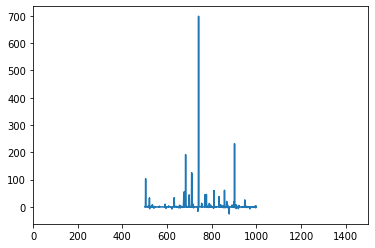

In [34]:
# This will work in a way that respects pandas indices

x_pd = pd.Series(x, index=range(500,500+len(x)))
y_pd = pd.Series(y)

ufunc_function(x_pd, y_pd).plot()

<AxesSubplot:>

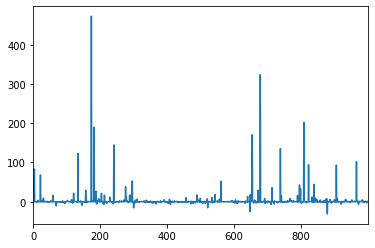

In [35]:
# Our naive loop will throw this away - plenty of opportunities for bugs...

pd.Series(naive_function_loop(x_pd, y_pd)).plot()

In [36]:
#  Thinking back to the (bad) mantras - how does this vectorized (ufunc) style address these concerns?

# Advanced Profiling (cProfile)

In [37]:
import cProfile

In [38]:
from autumn.tools.project import get_project

In [39]:
p = get_project('covid_19', 'malaysia')

In [40]:
m = p.build_model(p.param_set.baseline.to_dict())

In [41]:
%time m.run()

Wall time: 11.9 s


In [42]:
cProfile.run("m.run()", sort='cumtime')

         3953441 function calls (3938587 primitive calls) in 5.296 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    5.296    5.296 {built-in method builtins.exec}
        1    0.000    0.000    5.296    5.296 <string>:1(<module>)
        1    0.017    0.017    5.296    5.296 model.py:793(run)
        1    0.003    0.003    3.187    3.187 model.py:858(_solve_ode)
        1    0.000    0.000    3.184    3.184 solver.py:25(solve_ode)
        1    0.000    0.000    3.184    3.184 solver.py:63(solve_with_ivp)
        1    0.011    0.011    3.184    3.184 ivp.py:157(solve_ivp)
      617    0.003    0.000    2.960    0.005 base.py:160(step)
      617    0.049    0.000    2.957    0.005 rk.py:105(_step_impl)
      647    0.135    0.000    2.891    0.004 rk.py:15(rk_step)
     4480    0.050    0.000    2.672    0.001 vectorized_runner.py:290(_get_rates)
     3884    0.007    0.000    2.429    0.001 ba

       16    0.000    0.000    0.000    0.000 common.py:513(<lambda>)
        3    0.000    0.000    0.000    0.000 common.py:1078(is_datetime64_any_dtype)
        1    0.000    0.000    0.000    0.000 managers.py:186(_rebuild_blknos_and_blklocs)
        5    0.000    0.000    0.000    0.000 cast.py:953(maybe_cast_to_datetime)
       17    0.000    0.000    0.000    0.000 common.py:1845(_is_dtype_type)
        6    0.000    0.000    0.000    0.000 common.py:262(is_categorical)
        5    0.000    0.000    0.000    0.000 missing.py:25(isna)
        5    0.000    0.000    0.000    0.000 generic.py:3070(_set_as_cached)
        5    0.000    0.000    0.000    0.000 missing.py:105(_isna_new)
        1    0.000    0.000    0.000    0.000 base.py:116(__init__)
        1    0.000    0.000    0.000    0.000 common.py:35(validate_tol)
       10    0.000    0.000    0.000    0.000 base.py:2650(get_loc)
        1    0.000    0.000    0.000    0.000 managers.py:1841(_stack_arrays)
        7    0.

In [43]:
cProfile.run("m.run()", sort='tottime')

         3953441 function calls (3938587 primitive calls) in 5.237 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
40799/25961    0.440    0.000    0.665    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    13440    0.414    0.000    0.414    0.000 vectorized_runner.py:337(get_strain_infection_values)
     4480    0.369    0.000    1.122    0.000 vectorized_runner.py:240(_get_flow_rates)
      344    0.203    0.001    0.207    0.001 derived_outputs.py:160(_get_flow_output)
     4480    0.196    0.000    0.338    0.000 vectorized_runner.py:144(_apply_flow_weights_at_time)
        3    0.170    0.057    0.310    0.103 model_runner.py:238(_get_compartment_infectiousness_for_strain)
     5076    0.157    0.000    0.257    0.000 tracing.py:122(process)
     4480    0.150    0.000    0.588    0.000 location_adjuster.py:39(get_adjustment)
      185    0.145    0.001    0.179    0.001 derived_outputs

        1    0.000    0.000    5.237    5.237 {built-in method builtins.exec}
        6    0.000    0.000    0.000    0.000 blocks.py:3034(get_block_type)
        7    0.000    0.000    0.000    0.000 _dtype.py:321(_name_get)
       17    0.000    0.000    0.000    0.000 common.py:1845(_is_dtype_type)
       10    0.000    0.000    0.000    0.000 {method 'get_loc' of 'pandas._libs.index.IndexEngine' objects}
        6    0.000    0.000    0.000    0.000 blocks.py:199(mgr_locs)
        1    0.000    0.000    0.000    0.000 base.py:116(__init__)
        5    0.000    0.000    0.000    0.000 base.py:866(to_numpy)
       14    0.000    0.000    0.000    0.000 common.py:1702(is_extension_array_dtype)
        5    0.000    0.000    0.001    0.000 derived_outputs.py:246(_get_computed_value_output)
        1    0.000    0.000    0.000    0.000 {pandas._libs.lib.infer_dtype}
        1    0.000    0.000    0.000    0.000 base.py:1658(is_unique)
        4    0.000    0.000    0.000    0.000 repor

In [44]:
build_options = {
    "enable_validation": False,
    "derived_outputs_idx_cache": m._derived_outputs_idx_cache
}

In [45]:
%time m = p.build_model(p.param_set.baseline.to_dict(), build_options=build_options)

Wall time: 1.76 s


In [46]:
%time m.run()

Wall time: 4.63 s


In [47]:
p = get_project('sm_sir', 'malaysia')

In [48]:
%time m = p.build_model(p.param_set.baseline.to_dict())

Wall time: 117 ms


In [49]:
%time m.run()

Wall time: 319 ms


In [50]:
cProfile.run("m.run()", sort='cumtime')

         269561 function calls (269035 primitive calls) in 0.395 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.395    0.395 {built-in method builtins.exec}
        1    0.000    0.000    0.395    0.395 <string>:1(<module>)
        1    0.000    0.000    0.395    0.395 model.py:793(run)
        1    0.000    0.000    0.304    0.304 model.py:858(_solve_ode)
        1    0.000    0.000    0.304    0.304 solver.py:25(solve_ode)
        1    0.000    0.000    0.304    0.304 solver.py:63(solve_with_ivp)
        1    0.003    0.003    0.304    0.304 ivp.py:157(solve_ivp)
      376    0.001    0.000    0.276    0.001 base.py:160(step)
      376    0.009    0.000    0.275    0.001 rk.py:105(_step_impl)
      376    0.022    0.000    0.261    0.001 rk.py:15(rk_step)
     2629    0.019    0.000    0.242    0.000 vectorized_runner.py:290(_get_rates)
     2258    0.002    0.000    0.232    0.000 base

       65    0.000    0.000    0.000    0.000 multiarray.py:75(empty_like)
       65    0.000    0.000    0.000    0.000 numeric.py:71(_zeros_like_dispatcher)
       19    0.000    0.000    0.000    0.000 derived_outputs.py:243(<listcomp>)
        1    0.000    0.000    0.000    0.000 common.py:1578(is_bool_dtype)
        2    0.000    0.000    0.000    0.000 arrays.py:7(extract_array)
        1    0.000    0.000    0.000    0.000 {method 'any' of 'numpy.generic' objects}
        2    0.000    0.000    0.000    0.000 generic.py:127(__init__)
        2    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 dtypes.py:929(construct_from_string)
        1    0.000    0.000    0.000    0.000 model.py:834(_set_backend)
        2    0.000    0.000    0.000    0.000 base.py:2650(get_loc)
        1    0.000    0.000    0.000    0.000 managers.py:1443(__init__)
        4    0.000    0.000    0.000    0.000 <frozen importlib.

In [51]:
cProfile.run("m.run()", sort='tottime')

         269561 function calls (269035 primitive calls) in 0.396 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2629    0.070    0.000    0.098    0.000 vectorized_runner.py:144(_apply_flow_weights_at_time)
     2629    0.030    0.000    0.167    0.000 vectorized_runner.py:240(_get_flow_rates)
     2629    0.026    0.000    0.041    0.000 vectorized_runner.py:217(_calculate_strain_infection_values)
      376    0.022    0.000    0.262    0.001 rk.py:15(rk_step)
       19    0.021    0.001    0.041    0.002 outputs.py:285(convolve_probability)
     2629    0.019    0.000    0.243    0.000 vectorized_runner.py:290(_get_rates)
    26365    0.017    0.000    0.026    0.000 adjust.py:59(get_new_value)
     7055    0.017    0.000    0.017    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     3000    0.016    0.000    0.020    0.000 scale_up.py:420(curve)
     2629    0.010    0.000    0.010    0.000 vectorized_runner.py:

        1    0.000    0.000    0.000    0.000 vectorized_runner.py:52(<listcomp>)
        1    0.000    0.000    0.004    0.004 vectorized_runner.py:25(prepare_to_run)
        1    0.000    0.000    0.000    0.000 model_runner.py:128(<listcomp>)
      168    0.000    0.000    0.000    0.000 {built-in method fromkeys}
      105    0.000    0.000    0.000    0.000 flows.py:63(get_weight_value)
        1    0.000    0.000    0.000    0.000 vectorized_runner.py:100(_map_blocks)
        1    0.000    0.000    0.000    0.000 vectorized_runner.py:182(_build_infectious_multipliers_lookup)
       65    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copyto)
       80    0.000    0.000    0.000    0.000 graph.py:1530(<genexpr>)
      105    0.000    0.000    0.000    0.000 compartment.py:76(has_name_in_list)
       19    0.000    0.000    0.042    0.002 derived_outputs.py:240(_get_func_output)
      135    0.000    0.000    0.000    0.000 flows.py:85(<listcomp>)
        1    0.

        1    0.000    0.000    0.000    0.000 base.py:4051(equals)
        1    0.000    0.000    0.000    0.000 managers.py:98(<listcomp>)
        2    0.000    0.000    0.000    0.000 managers.py:308(<genexpr>)
        1    0.000    0.000    0.000    0.000 series.py:382(_set_subtyp)
        2    0.000    0.000    0.000    0.000 blocks.py:308(dtype)
        1    0.000    0.000    0.000    0.000 managers.py:1850(_shape_compat)
        1    0.000    0.000    0.000    0.000 model_runner.py:30(__init__)
        1    0.000    0.000    0.000    0.000 {method 'view' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.000    0.000 common.py:122(classes_and_not_datetimelike)
        1    0.000    0.000    0.000    0.000 series.py:476(_values)
        3    0.000    0.000    0.000    0.000 digraph.py:1117(is_directed)
        1    0.000    0.000    0.002    0.002 outputs.py:353(notifications_func)
        3    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_float}
        3    0.0